1 . Import Libraries

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math, copy
import seaborn as sns
sns.set()

2 . Load Dataset

In [99]:
df = pd.read_csv("../data/Linear Regression.csv", delimiter = ",", header = 0)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
T = np.array(range(len(df)))
T

In [100]:
df.shape

(1338, 7)

3 . Checking Null Values

In [101]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [102]:
df1 = df
for i in range(len(df1.columns)):   
    print(df1.columns[i])
    

age
sex
bmi
children
smoker
region
charges


# Preprocessing

In [103]:
df1.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

c:\Users\Asanka\.conda\envs\venv1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


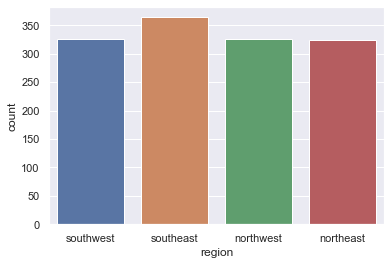

In [104]:
sns.countplot(df1['region'])
sns.set_theme(style="whitegrid", palette="pastel")

##  Charges

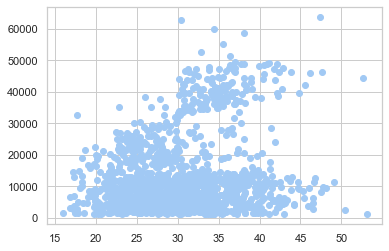

In [105]:
plt.scatter(df1.bmi,df1.charges)

##      Sex

In [106]:
df1.sex.unique()

array(['female', 'male'], dtype=object)

c:\Users\Asanka\.conda\envs\venv1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


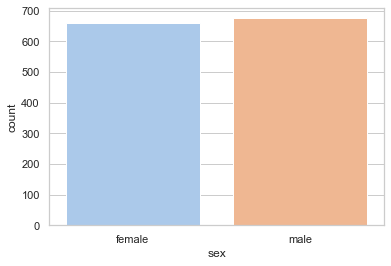

In [107]:
sns.countplot(df1['sex'])
sns.set_theme(style="whitegrid", palette="pastel")

In [108]:
# df1.replace({'sex':{'male':1,'female':0}})

In [109]:
# df1.replace({'smoker':{'yes':1,'no':0}})

##  Smoker

c:\Users\Asanka\.conda\envs\venv1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


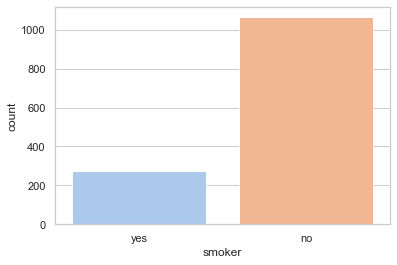

In [110]:
sns.countplot(df1['smoker'])
sns.set_theme(style="whitegrid", palette="pastel")

##          Age

In [111]:
print("Age [ max = ",np.max(df1['age'])," | mean = ",np.mean(df1['age'])," min = ",np.min(df1['age'])," ]")

Age [ max =  64  | mean =  39.20702541106129  min =  18  ]


## Correlation

In [112]:
df1.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [113]:
df2 = df1.drop("charges", axis = 1)
df2

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


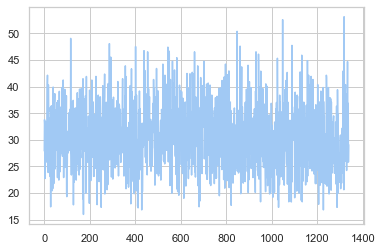

In [138]:

plt.plot(df2.bmi)


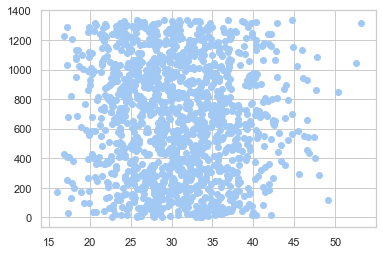

In [139]:
plt.scatter(df2.bmi,T)

In [114]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
transform = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,4,5])], remainder='passthrough')
X = np.array(transform.fit_transform(df2))

In [115]:
X_ =pd.DataFrame(X)

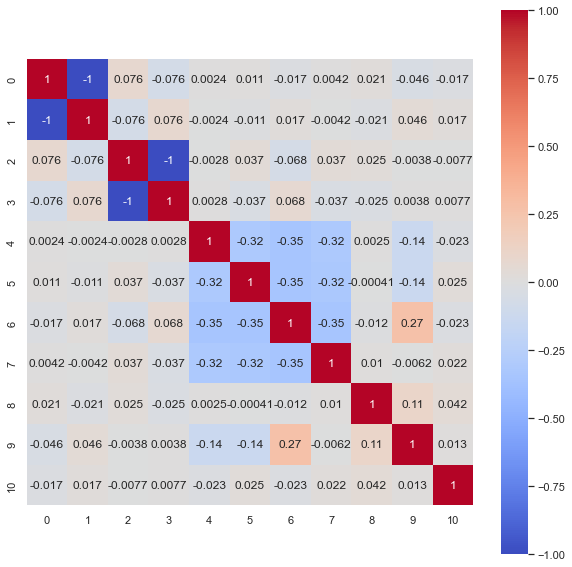

In [116]:
plt.figure(figsize=(10,10))
sns.heatmap(X_.corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

In [117]:
Y = df1.iloc[:,-1]
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [118]:
X

array([[ 1.  ,  0.  ,  0.  , ..., 19.  , 27.9 ,  0.  ],
       [ 0.  ,  1.  ,  1.  , ..., 18.  , 33.77,  1.  ],
       [ 0.  ,  1.  ,  1.  , ..., 28.  , 33.  ,  3.  ],
       ...,
       [ 1.  ,  0.  ,  1.  , ..., 18.  , 36.85,  0.  ],
       [ 1.  ,  0.  ,  1.  , ..., 21.  , 25.8 ,  0.  ],
       [ 1.  ,  0.  ,  0.  , ..., 61.  , 29.07,  0.  ]])

In [119]:
X.shape

(1338, 11)

In [126]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, Y)

LinearRegression()

In [128]:
lin_reg_2.score(X_poly,Y)

0.8715932967527219